In [1]:
#Generating recurrent plots from eeg data
#eeg data is in the form of a text file

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display_html
import matplotlib.image as mpimg
import IPython.display as ipd
from sklearn.preprocessing import MinMaxScaler

In [3]:
# pip install numpy==1.21.6

In [4]:
# pip install pyts

In [5]:
import pyts
from pyts.image import RecurrencePlot

In [6]:
def generate_rp(frame, dimension, threshold, percentage, time_delay):
    # Preparing RP Data as a numpy array
    data_rp = []
    data_rp.append(frame.reshape(1,-1))
    data_rp.append(frame.reshape(1,-1))
    data_rp = np.asarray(data_rp)

    # Recurrence plot transformation
    X_rp1 = RecurrencePlot(dimension=dimension, time_delay=time_delay, threshold=threshold, percentage=percentage).fit_transform(data_rp[0])[0]

    # Applying cmap = binary to generate grayscale image
    imgplot = plt.imshow(X_rp1, cmap='binary', origin='lower')
    fig1 = plt.gcf()
    plt.close(fig1)
    return fig1, X_rp1

In [7]:
# Set the parameters for generating the recurrence plot

dimension = 2
#embedding dimension 
#represents no. of variables you want to include in the recurrence plot
#higher => capture more complex patterns in data but requires more data points and computational resources

time_delay = 2
#controls lag between variables in rp
#larger => capture slower patterns in data
#smaller => capture faster patterns

threshold = 15
#cutoff distance between points in the phase space
#closer pts considered to be recurrent and plotted in rp
#None means median distance is used as the cutoff value

percentage = 0 #0 implies all recurrence points are plotted
#percentage 1 means only most recurrent points are plotted

# generate_rp(frame, 2, None, 0, file_no_ext, count,6) 
#             frame, dimension, threshold, percentage, file_name, count,time_delay

In [8]:
# Set the root directory for the EEG dataset
# root_dir = 'C:\\Users\\shrav\\NN'

In [9]:
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart(); setTimeout(function(){IPython.notebook.execute_all_cells();}, 10000)</script>",raw=True)

In [10]:
import os
import numpy as np
import pandas as pd

datasetDir = "C:\\Users\\shrav\\NN\\Bonn\\"
fileAlreadyProcessed = {}
region = ["N", "F"]
# region = ["F"]

for folder in region:
    root_dir = datasetDir+folder 
    if os.path.exists(root_dir+"\\recurrence_plots"):
        for file_name in os.listdir(root_dir+"\\recurrence_plots"):
            if file_name.endswith('.png'):
                if (folder=="N"):
                    text_file_name = file_name.replace(".png", ".TXT")
                elif(folder=="F"):
                    text_file_name = file_name.replace(".png", ".txt")
                text_file_path = os.path.join(root_dir, text_file_name)
                if os.path.exists(text_file_path):
                    fileAlreadyProcessed[text_file_name] = True
fileAlreadyProcessed

{'N001.TXT': True,
 'N002.TXT': True,
 'N003.TXT': True,
 'N004.TXT': True,
 'N005.TXT': True,
 'N006.TXT': True,
 'N007.TXT': True,
 'N008.TXT': True,
 'N009.TXT': True,
 'N010.TXT': True,
 'N011.TXT': True,
 'N012.TXT': True,
 'N013.TXT': True,
 'N014.TXT': True,
 'N015.TXT': True,
 'N016.TXT': True,
 'N017.TXT': True,
 'N018.TXT': True,
 'N019.TXT': True,
 'N020.TXT': True,
 'N021.TXT': True,
 'N022.TXT': True,
 'N023.TXT': True,
 'N024.TXT': True,
 'N025.TXT': True,
 'N026.TXT': True,
 'N027.TXT': True,
 'N028.TXT': True,
 'N029.TXT': True,
 'N030.TXT': True,
 'N031.TXT': True,
 'N032.TXT': True,
 'N033.TXT': True,
 'N034.TXT': True,
 'N035.TXT': True,
 'N036.TXT': True,
 'N037.TXT': True,
 'N038.TXT': True,
 'N039.TXT': True,
 'N040.TXT': True,
 'N041.TXT': True,
 'N042.TXT': True,
 'N043.TXT': True,
 'N044.TXT': True,
 'N045.TXT': True,
 'N046.TXT': True,
 'N047.TXT': True,
 'N048.TXT': True,
 'N049.TXT': True,
 'N050.TXT': True,
 'N051.TXT': True,
 'N052.TXT': True,
 'N053.TXT':

Folder: N
Folder: F
File: F096.txt


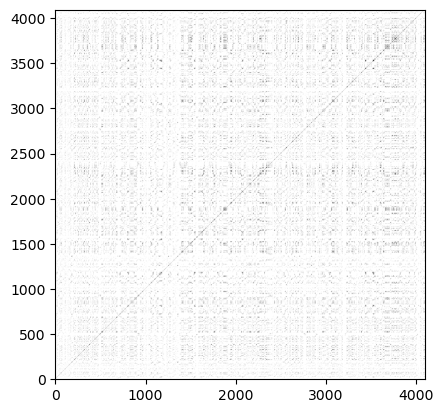

File: F097.txt


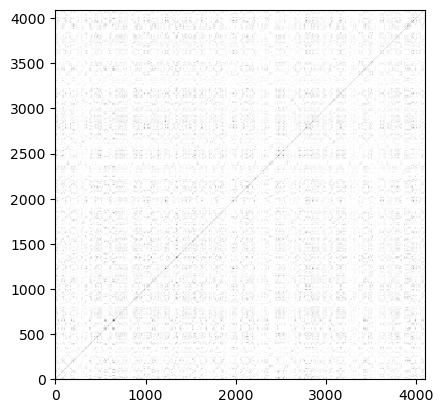

File: F098.txt


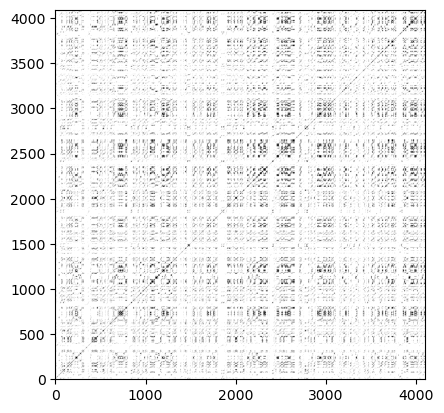

File: F099.txt


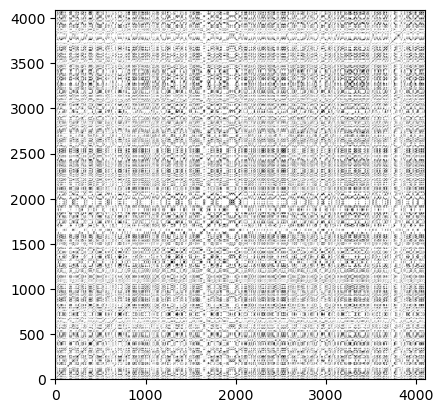

File: F100.txt


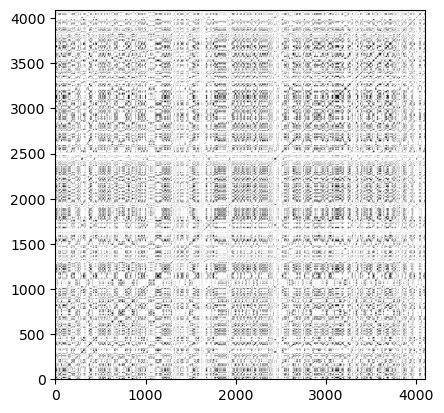

In [11]:
restartCounter = 0
for folder in region:
    print('Folder:',folder)
    root_dir = datasetDir+folder
    for file_name in os.listdir(root_dir):
        if (file_name.endswith('.txt') or file_name.endswith('.TXT')):
            if file_name not in fileAlreadyProcessed:
                    print('File:', file_name)
                    # Load the EEG data from the file
                    eeg_data = np.loadtxt(os.path.join(root_dir, file_name))
                    # Generate the recurrence plot for the EEG data
                    rp_fig, rp_data = generate_rp(eeg_data, dimension, threshold, percentage, time_delay)
                    # Save the recurrence plot as an image file
                    save_path = os.path.join(root_dir, 'recurrence_plots')
                    if not os.path.exists(save_path):
                        os.makedirs(save_path)
                    plt.imsave(os.path.join(save_path, file_name[:-4] + '.png'), rp_data, cmap='binary')
                    restartCounter += 1
                    # Display the recurrence plot in the notebook
                    display(rp_fig)
                    if(restartCounter>=15):
                        restartCounter=0
                        print("Going to restart kernel")
                        restartkernel()